In [81]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches

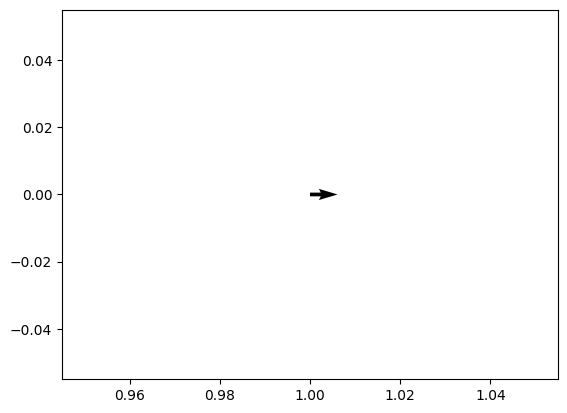

In [2]:
# One arrow vector field

x = 1 # Location of the arrow (X)
y = 0 # Location of the arrow (Y)
u = 1 # Direction of the arrow (X)
v = 0 # Direction of the arrow (Y)

plt.quiver(x, y, u, v)
plt.show()

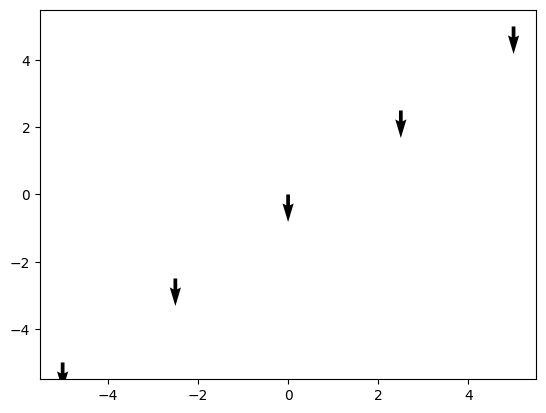

In [8]:
# np.linspace = Linear Space (min_x, max_x, how many point)

x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 5)
u = 0
v = -9.8

plt.quiver(x, y, u, v)
plt.show()

In [10]:
# Mesh Grid - Takes your X vals and Y vals and fills in the other spots
x = np.linspace(-5, 5, 5)
y = np.linspace(-5, 5, 5)
(x,y) = np.meshgrid(x,y)
print(x,y)

[[-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]
 [-5.  -2.5  0.   2.5  5. ]] [[-5.  -5.  -5.  -5.  -5. ]
 [-2.5 -2.5 -2.5 -2.5 -2.5]
 [ 0.   0.   0.   0.   0. ]
 [ 2.5  2.5  2.5  2.5  2.5]
 [ 5.   5.   5.   5.   5. ]]


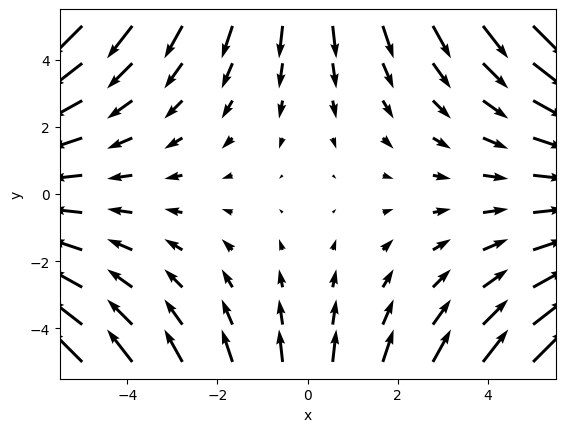

In [17]:
# Basic Vector Field
x = np.linspace(-5, 5, 10)
y = np.linspace(-5, 5, 10)
(x,y) = np.meshgrid(x,y)
u = x
v = -y

plt.xlabel('x')
plt.ylabel('y')
plt.quiver(x, y, u, v)
plt.show()

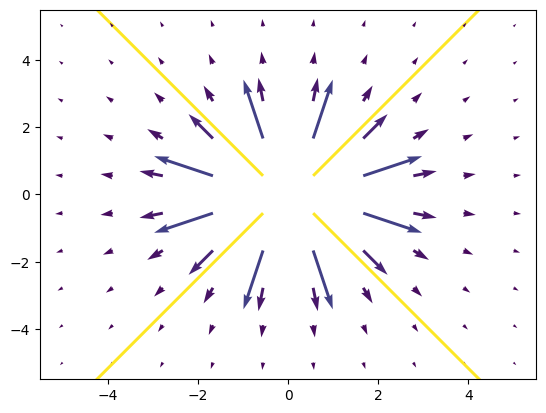

In [20]:
# Point Charge Vector Field
kq = 1
u = kq*x/(x**2+y**2)**(3/2)
v = kq*y/(x**2+y**2)**(3/2)
color=kq/(x**2+y**2)
plt.quiver(x, y ,u, v, color)
plt.show()

# From notes and formulas

In [87]:
# Creating a 2D grid with np.meshgrid() 5x5
x = np.linspace(1,5,5)
y = np.linspace(1,5,5)
grid = np.meshgrid(x,y)

# Accessing points of the graph
x_cord = grid[0][2,3]
y_cord = grid[1][3,2]

In [88]:
def electric_field_calc(distance_point=list ,calculate_point=list, point_charge=float):
    # finding the distance
    distance_point, calculate_point = np.array(distance_point), np.array(calculate_point)
    distance = np.linalg.norm(distance_point - calculate_point)

    # Plug distance into formula
    coulombs_law = 8.99 * 10**9*(point_charge/distance**2)
    
    # Direction of the electric field
    direction = (calculate_point - distance_point) / distance

    # Vector 
    electric_field_vector = direction * coulombs_law

    return coulombs_law, electric_field_vector

In [89]:
# Calculate the electric field at multiple points
x = np.linspace(0, 10 ,20)
y = np.linspace(0, 10, 20)
grid_x,grid_y = np.meshgrid(x,y)

In [90]:
# +3 charge at corr. 3,5 | -5 charge at corr (6,5)
point_charges = [(4.8*10**-19,(3,5)), (-8*10**-19, (6,5))]

# Create empty grid of 0's to prepare iteration of magnitude of points effected by charges
electric_field_x = np.zeros(grid_x.shape)
electric_field_y = np.zeros(grid_y.shape)

In [91]:
# Review this because I really do not fully understand this | Stackoverflow 

for i in range(grid_x.shape[0]):  # Loop over rows
    for j in range(grid_x.shape[1]):  # Loop over columns
        # Get the coordinates of the grid point
        x_coord = grid_x[i, j]  # x-coordinate
        y_coord = grid_y[i, j]  # y-coordinate
        
        # Now you can calculate the electric field at this point
        for charge, position in point_charges:
            # position is the coordinate of the charge, e.g., (3, 5)
            e_field_magnitude, e_field_vector = electric_field_calc(position, (x_coord, y_coord), charge)
            # Update electric field arrays as needed

            # Update the electric field components at (i, j)
            electric_field_x[i, j] += e_field_vector[0]
            electric_field_y[i, j] += e_field_vector[1]

<function matplotlib.pyplot.show(close=None, block=None)>

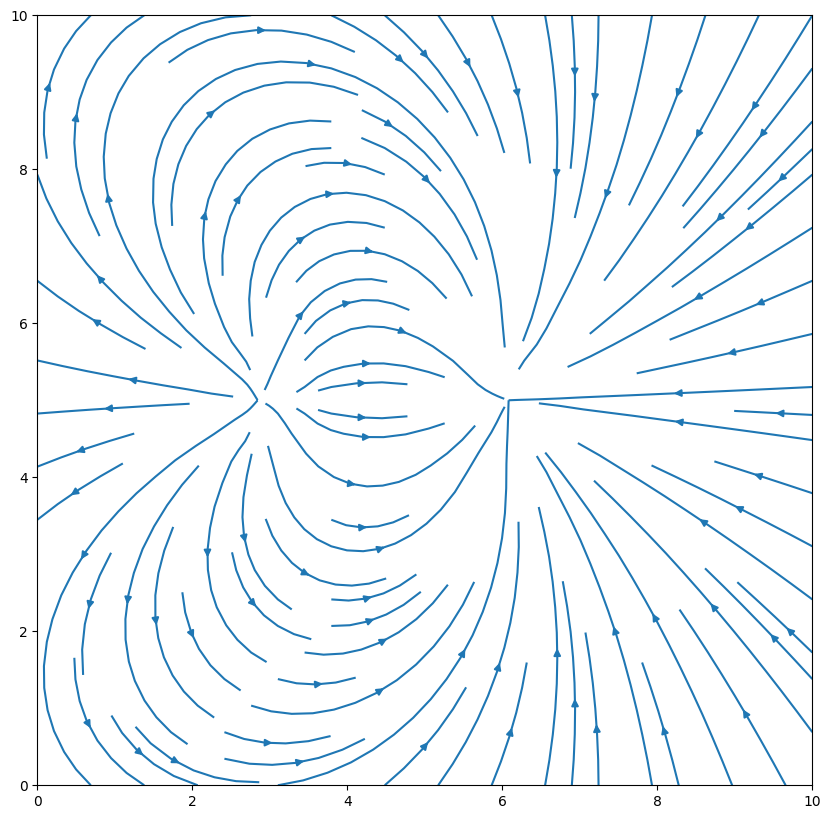

In [92]:
plt.figure(figsize=(10,10))

plt.streamplot(grid_x, grid_y, electric_field_x, electric_field_y)
plt.show

# Practice | Electric Dipole 

In [106]:
# Define cords for point charges
q1_charge = 5*10**-6
q2_charge = -5*10**-6

q1_pos = (3,4) # Position of Positive Charge (5)
q2_pos = (6,4) # Negative Charge (-5)

# create graph | from 1 to 8 by 1
x_graph = np.linspace(1, 8, 50)
y_graph = np.linspace(1, 8, 50)

x_mesh, y_mesh = np.meshgrid(x_graph, y_graph)

In [107]:
def calc_e_field(charge_position, charge_value, meshgrid_x, meshgrid_y):
    distance = np.sqrt((meshgrid_x-charge_position[0])**2+(meshgrid_y-charge_position[1])**2)

    c_law = 8.99*10**9*(charge_value)/distance**2

    x_direction = c_law*(meshgrid_x - charge_position[0])/distance
    y_direction = c_law*(meshgrid_y - charge_position[1])/distance

    return x_direction, y_direction


In [108]:
# For q1 (positive charge)
x_q1, y_q1 = calc_e_field(q1_pos, q1_charge, x_mesh, y_mesh)

# For q2 (negative charge)
x_q2, y_q2 = calc_e_field(q2_pos, q2_charge, x_mesh, y_mesh)

total_x = x_q1 + x_q2
total_y = y_q1 + y_q2

C:\Users\matth\AppData\Local\Temp\ipykernel_22040\3179537062.py:4: RuntimeWarning: divide by zero encountered in divide
  c_law = 8.99*10**9*(charge_value)/distance**2
C:\Users\matth\AppData\Local\Temp\ipykernel_22040\3179537062.py:6: RuntimeWarning: invalid value encountered in multiply
  x_direction = c_law*(meshgrid_x - charge_position[0])/distance
C:\Users\matth\AppData\Local\Temp\ipykernel_22040\3179537062.py:7: RuntimeWarning: invalid value encountered in multiply
  y_direction = c_law*(meshgrid_y - charge_position[1])/distance


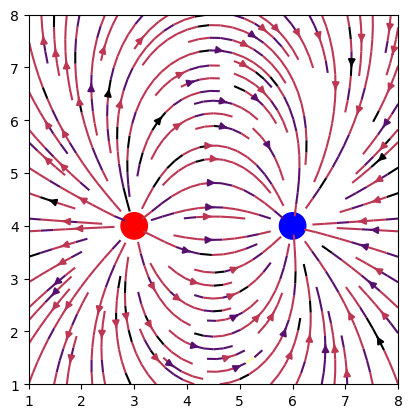

In [109]:
fig, ax = plt.subplots()
plt.streamplot(x_mesh, y_mesh, total_x, total_y, color=magnitude, cmap='inferno')

# Positive 
circle1 = patches.Circle((3, 4), radius=.25, color='red', fill=True)
ax.add_patch(circle1)

# neg charge
circle2 = patches.Circle((6, 4), radius=.25, color='blue', fill=True)
ax.add_patch(circle2)

ax.set_aspect('equal')